In [1]:
import pandas as pd
import numpy as np

from scipy.interpolate import Rbf

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_theme(style="whitegrid", context='talk', font_scale=1.5, font="Helvetica")

# What is Statistical Learning?

$$Y = f(X) + \epsilon \quad ,$$ 

where $X$ is the input, $Y$ is the quantitative response, and $\epsilon$ is
the random error term.*=

**Q:** How much different advertising methods affect sale?

In [2]:
advertising = pd.read_csv('../datasets/Advertising.csv', index_col=0)

<Axes: xlabel='newspaper', ylabel='sales'>

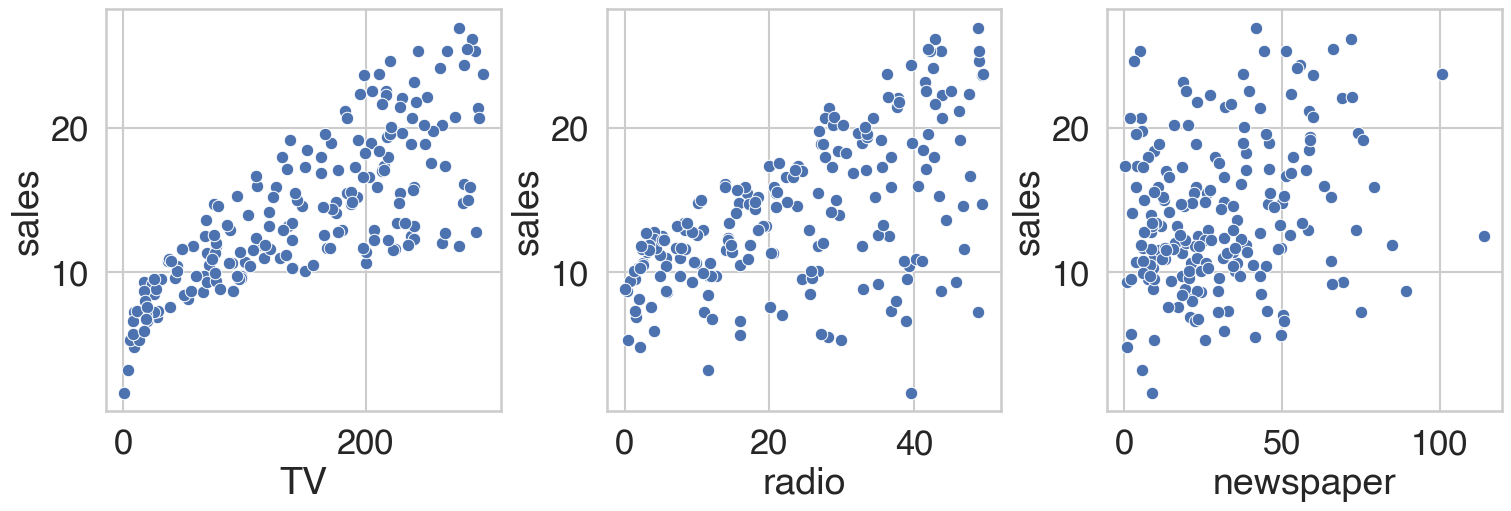

In [3]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15,5),
    constrained_layout=True)
axes = axes.flatten()

sns.scatterplot(data=advertising, x='TV', y='sales', ax=axes[0])

sns.scatterplot(data=advertising, x='radio', y='sales', ax=axes[1])

sns.scatterplot(data=advertising, x='newspaper', y='sales', ax=axes[2])

**Q:** How much income depends on education and/or age?

In [4]:
income = pd.read_csv('../datasets/Income1.csv', index_col=0)
income2 = pd.read_csv('../datasets/Income2.csv', index_col=0)

<Axes: xlabel='Education', ylabel='Income'>

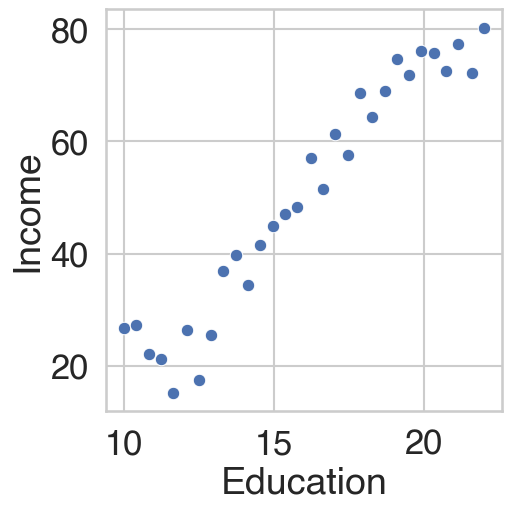

In [5]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5,5),
    constrained_layout=True)

sns.scatterplot(data=income, x='Education', y='Income', ax=ax)

## How Do We Estimate $f$?

### Parametric method:
1. Assumption about the functional form of $f$, e.g.,
$f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p$

2. Fit or train the model.

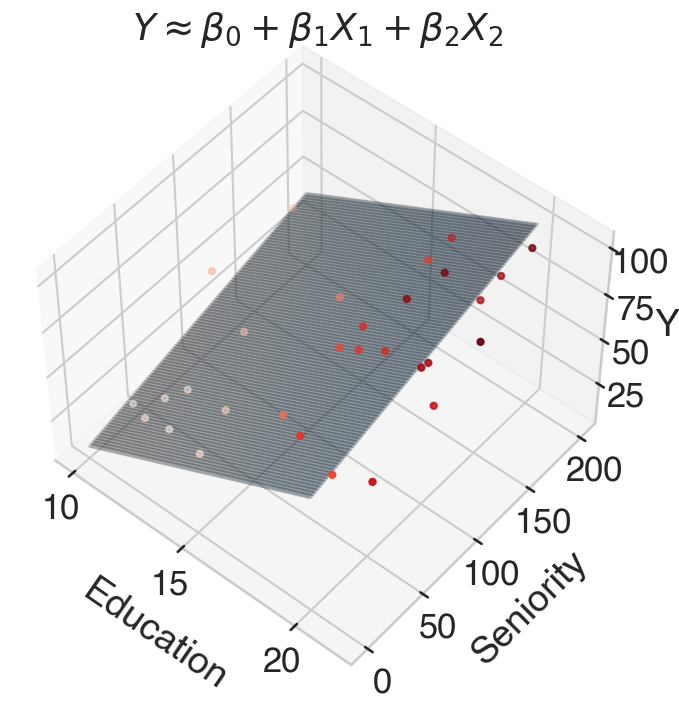

In [6]:
X = income2.Education
Y = income2.Seniority
Z = income2.Income

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='Reds', marker='o')
XY = np.column_stack((X, Y))
model = LinearRegression()
model.fit(XY, Z)
X_grid, Y_grid = np.meshgrid(np.linspace(10, 20, 100), np.linspace(0, 200, 100))
Z_grid = model.intercept_ + model.coef_[0] * X_grid + model.coef_[1] * Y_grid
ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.2, cmap='Blues', rstride=1, cstride=1, edgecolor='k')
ax.set_xlabel('Education', labelpad=20)
ax.set_ylabel('Seniority', labelpad=20)
ax.set_zlabel('Y', labelpad=5)

ax.view_init(elev=50, azim=310) 
plt.title(r'$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2$')
plt.show()

### Non-parametric method:

No explicit assumption about the functional form of $f$ is made.

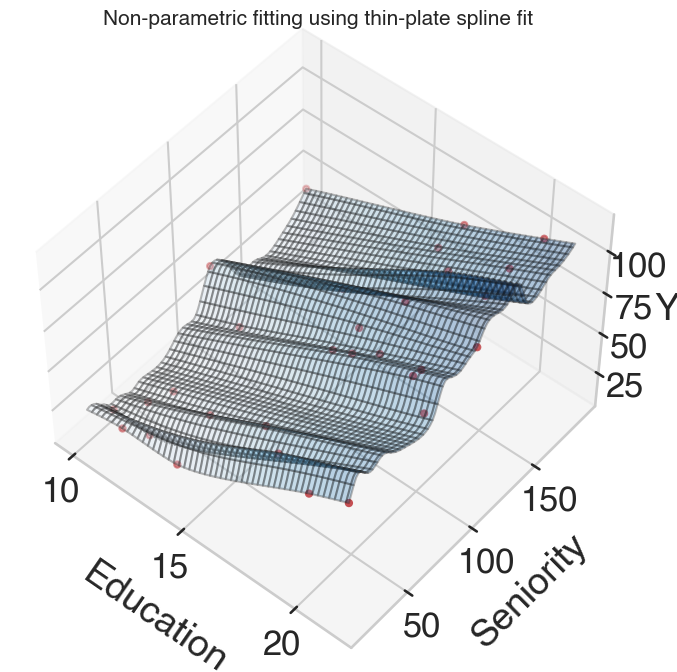

In [7]:
tps = Rbf(X, Y, Z, function='thin_plate')

xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = tps(xi, yi)


# Plot the original data and the fitted surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, color='r', zorder=10)
ax.plot_surface(xi, yi, zi, cmap='Blues', alpha=0.3, zorder=2, edgecolor='k')
ax.set_xlabel('Education', labelpad=20)
ax.set_ylabel('Seniority', labelpad=20)
ax.set_zlabel('Y', labelpad=5)
plt.title(r'Non-parametric fitting using thin-plate spline fit', fontsize=15)

ax.view_init(elev=50, azim=310) 
plt.show()

**Why ever choose a more restrictive method?**

_Interpretability vs flexibility_, e.g., the least squares approach is more
interpretable and less flexible, whereas deep learning is more flexible and
less interpretable.

## Supervised vs Unsupervised Learning

Unsupervised leaning is required when for every observation $i = 1 \dots
n$, we have a vector of measurements $x_i$ but no associated response
$y_i$.

_note:_ The nature of the response, qualitative versus quantitative
determines the statistical learning method of choice, i.e., classification
versus regression. However, the nature of the
predictors are not important in such decision.

## Assessing Model Accuracy

### Measuring the Quality of Fit

The mean squared error (MSE):

$$\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{f}(x_i))^2$$

1- During learning, observations $\{ (x_1, y_1), (x_2, Y_2), \dots, (x_n,
  y_n)\}$ are used to estimate $\hat{f}$.

2- Is $\hat{f}(x_0) \approx y_0$ where $(x_0, y_0)$ is a previously unseen
  observation.

In [8]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


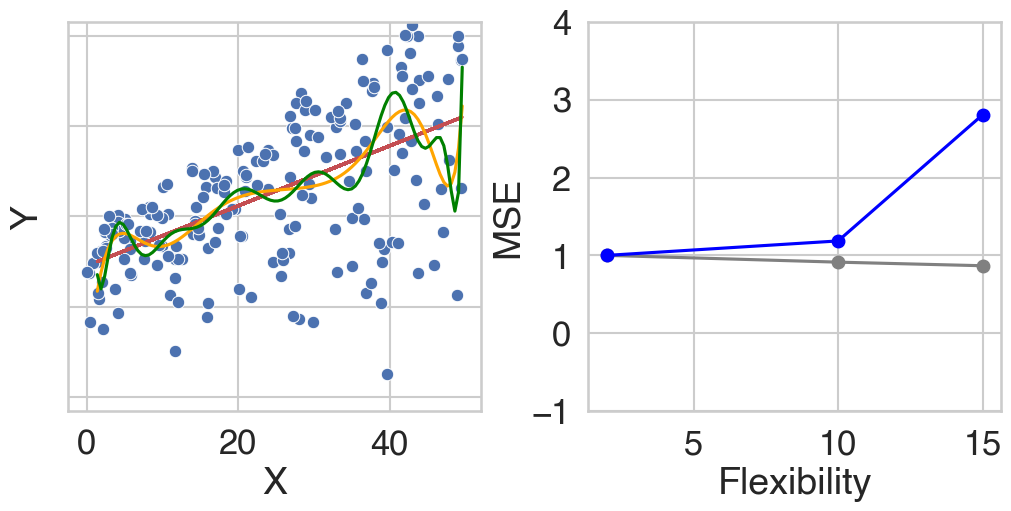

In [9]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10,5),
    constrained_layout=True)
axes = axes.flatten()

sns.scatterplot(data=advertising, x='radio', y='sales', ax=axes[0])

x = advertising.radio[:100]
y = advertising.sales[:100]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
axes[0].plot(x, m*x + c, 'r', label='Fitted line')

func2 = np.poly1d(np.polyfit(x, y, 10))
xp = np.linspace(np.min(x), np.max(x), 100)
axes[0].plot(xp, func2(xp), 'orange', '--')

func3 = np.poly1d(np.polyfit(x, y, 15))
xp = np.linspace(np.min(x), np.max(x), 100)
axes[0].plot(xp, func3(xp), 'green', '--')

axes[0].set_ylim(-1,np.max(y)+1)
axes[0].set_yticks(np.linspace(0, np.max(y), 5))
axes[0].set_yticklabels([])
axes[0].set(xlabel=r'X', ylabel=r'Y')


flexibility = [2, 10, 15]
mse_training = [mean_squared_error(y, [m*i + c for i in x]), mean_squared_error(y, [func2(i) for i in x]), mean_squared_error(y, [func3(i) for i in x])]
axes[1].plot(flexibility, mse_training/mse_training[0], '-o', color='gray')
x_test = advertising.radio[100:]
y_test = advertising.sales[100:]
mse_test = [mean_squared_error(y_test, [m*i + c for i in x_test]), mean_squared_error(y_test, [func2(i) for i in x_test]), mean_squared_error(y_test, [func3(i) for i in x_test])]
axes[1].plot(flexibility, mse_test/mse_test[0], '-o', color='blue')
axes[1].set(xlabel='Flexibility', ylabel='MSE', ylim=(-1, 4));


### The Bias-Variance Trade-Off

The expected test MSE for a given $x_0$ can be decomposed:

$$E(y_0 - \hat{f}(x_0))^2 = \mathrm{Var}(\hat{f}(x_0)) + [
\mathrm{Bias}(\hat{f}(x_0))]^2 + \mathrm{Var}(\epsilon) \quad .$$

**We need to select a method that simultaneously lowers variance and
bias.**

+ _Variance_: the amount by which $\hat{f}$ would change if we
estimated it using a different training data set.

+ _Bias_: the error that is introduced by approximating a real-life
  problem.

The most common approach to quantify the accuracy of $\hat{f}$ is the
training error rate:

$$\frac{1}{n} \sum_{i=1}^{n} I(y_i \neq \hat{y}_i) \quad .$$

The test error rate is:

$$\mathrm{Ave}(I(y_i \neq \hat{y}_i)) \quad .$$

## Classification

### The Bayes Classifier

The test error rate is minimized by a simple classifier:

$$\mathrm{Pr}(Y=j | X=x_0) \quad ,$$

with an overall error rate of

$$1 - E \bigl( \mathrm{max } \mathrm{Pr}(Y=j|X)\bigr) \quad .$$

### K-Nearest Neighbors

Sine the Bayes classifier is purely theoretical, since we on not know the
condition distributions of real data, many methods have been proposed to
estimate these conditional distribution. For example in KNN, where:

$$\mathrm{Pr}(Y=j|X=x_0) = \frac{1}{K} \sum_{i \in \mathcal{N}_0} I(y_i=j)
\quad ,$$

where $\mathcal{N}_0$ represents points that are closest to $x_0$.